# Моделирование 2 | Мегатрон

Внутри бесконечно длинного цилиндрического соленоида диаметром $D$, с числом витков на единицу длины $n$, установлен вакуумный диод с цилиндрическим анодом и катодом. Радиусы анода и катода $R_a$ и $R_k$ соответственно. Оси диода и соленоида совпадают. При нагреве катода из него без начальной скорости вырываются электроны. Между анодом и катодом приложена разность потенциалов $U$, которая может изменяться в диапазоне от $U_1$ до $U_2$. 

При каком токе в соленоиде $I_c$ электрон будет описывать окружность диаметром $(R_a-R_k)$?
Построить траекторию движения электрона при заданном $U$ и $I_c$.
Построить диаграмму ($I_c$ от $U$) на которой отметить область в которой электрон
описывает окружность диаметром $(R_a-R_k)$. Параметры должны задаваться.

***Константы для расчетов:***
- Магнитная проницаемость вакуума ($\mu_0$):  
  $$ \mu_0 = 4 \pi \times 10^{-7} \text{ H/m или T}\cdot\text{m/A} $$
- Элементарный заряд ($e$):  
  $$ e = 1.602 \times 10^{-19} \text{ Кл} $$
- Масса электрона ($m_e$):  
  $$ m_e = 9.109 \times 10^{-31} \text{ кг} $$

***Параметры соленоида и диода, указанные в задаче:***
- Число витков на единицу длины ($n$):  
  $$ n = 100 \text{ витков/м} $$
- Радиус анода ($R_a$):  
  $$ R_a = 0.02 \text{ м} $$
- Радиус катода ($R_k$):  
  $$ R_k = 0.01 \text{ м} $$
- Напряжение ($U$):  
  $$ U = 100 \text{ В} $$

In [104]:
import numpy as np
import matplotlib.pyplot as plt

mu_0 = 4 * np.pi * 1e-7
e = 1.602e-19
m_e = 9.109e-31

n = 100
Ra = 0.02
Rk = 0.01
U = 100

1. **Скорость электрона**

Скорость электрона, вылетевшего из катода, можно определить по формуле:
$$ v = \sqrt{\frac{2Ue}{m_e}} $$

2. **Радиус круговой траектории электрона**

Радиус круговой траектории электрона определяется следующим образом:
$$ r = \frac{m_e v}{e B} $$

Из условия задачи, электрон описывает окружность диаметром $(R_a - R_k)$, поэтому радиус траектории:
$$ r = \frac{R_a - R_k}{2} $$

3. **Магнитное поле соленоида**

Магнитное поле $B$ внутри соленоида для такой траектории:
$$ B = \frac{m_e v}{e r} $$

4. **Ток $I_c$ в соленоиде**

Ток $I_c$, необходимый для создания такого магнитного поля:
$$ I_c = \frac{B}{\mu_0 n} $$

In [105]:

v = np.sqrt(2 * U * e / m_e)
r = (Ra - Rk) / 2
B = m_e * v / (e * r)
Ic = B / (mu_0 * n)


   $$
   I_c = \frac{B}{\mu_0 n} = \frac{m_e \sqrt{2Ue/m_e} \cdot 2 \cdot r}{e \cdot \mu_0 \cdot n}
   $$

In [106]:
U1 = 10
U2 = 200
U_values = np.linspace(U1, U2, 200)

Ic_values = (m_e * np.sqrt(2 * U_values * e / m_e) * 2 * r) / (e * mu_0 * n)

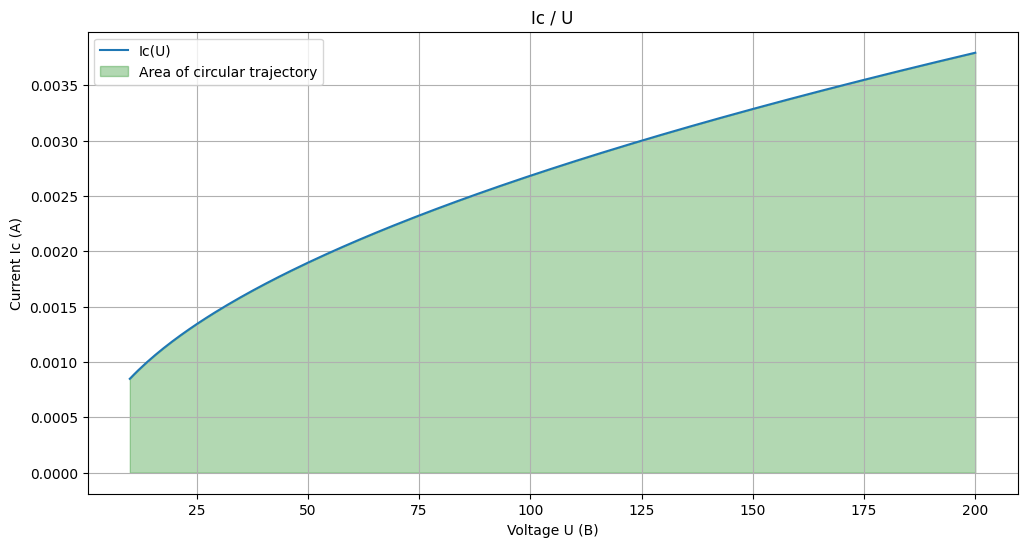

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(U_values, Ic_values, label='Ic(U)')
plt.fill_between(U_values, 0, Ic_values, color='green', alpha=0.3, label='Area of circular trajectory')
plt.title('Ic / U')
plt.xlabel('Voltage U (В)')
plt.ylabel('Current Ic (А)')
plt.legend()
plt.grid(True)
plt.show()


$$
x = r \cdot cos(\theta) \\
y = r \cdot sin(\theta)
$$

In [108]:
theta = np.linspace(0, 2 * np.pi, 100)
x = r * np.cos(theta)
y = r * np.sin(theta)

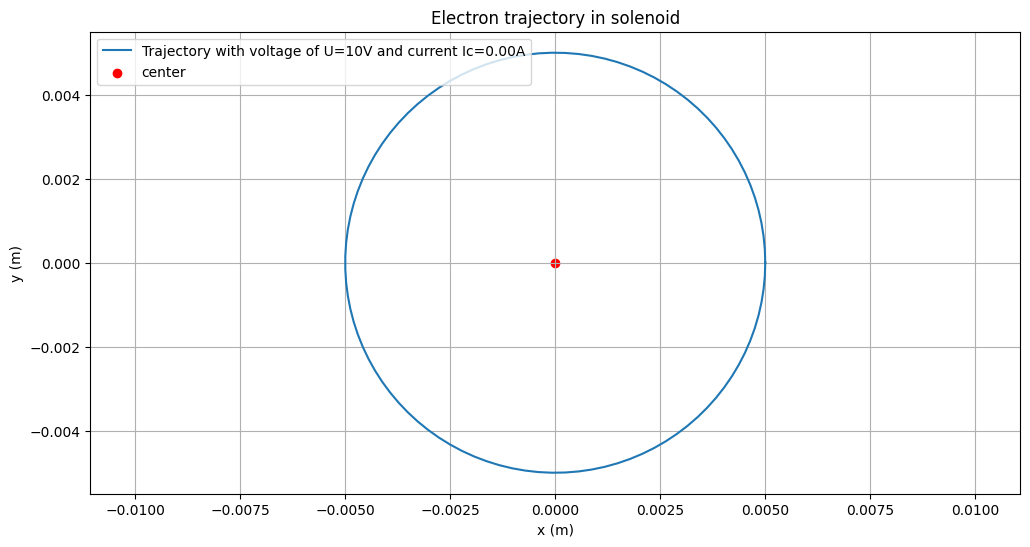

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label=f'Trajectory with voltage of U={U1}V and current Ic={Ic_values[0]:.2f}А')
plt.scatter([0], [0], color='red', label='center')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electron trajectory in solenoid')
plt.legend(loc='upper left')
plt.grid(True)
plt.axis('equal')
plt.show()